# Load Preprocessed Data on Corona Infection Status

In [1]:
import pandas as pd

corona_df = pd.read_csv('./corona_stat_preprocessed(0215~1208).csv')

print(corona_df.info()) # corona_df.dtypes
display(corona_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   seq        298 non-null    int64 
 1   statedt    298 non-null    object
 2   statetime  298 non-null    int64 
 3   createdt   298 non-null    object
 4   updatedt   19 non-null     object
 5   decidecnt  298 non-null    int64 
 6   examcnt    298 non-null    int64 
 7   deathcnt   298 non-null    int64 
 8   carecnt    298 non-null    int64 
 9   clearcnt   298 non-null    int64 
dtypes: int64(7), object(3)
memory usage: 23.4+ KB
None


,seq,statedt,statetime,createdt,updatedt,decidecnt,examcnt,deathcnt,carecnt,clearcnt
0,28,2020-02-15,16,2020-02-15 17:00:21.210,NaN,28,558,0,0,9
1,30,2020-02-16,16,2020-02-16 16:57:02.020,NaN,29,485,0,0,9
2,32,2020-02-17,16,2020-02-17 16:50:47.470,NaN,30,708,0,0,10
3,35,2020-02-18,16,2020-02-18 16:42:00.000,NaN,31,818,0,0,12
4,37,2020-02-19,16,2020-02-19 17:00:13.130,NaN,51,1149,0,0,16
...,...,...,...,...,...,...,...,...,...,...
293,342,2020-12-04,0,2020-12-04 09:44:32.682,NaN,36332,64017,536,7185,28611
294,343,2020-12-05,0,2020-12-05 10:15:39.581,NaN,36915,66267,540,7458,28917
295,344,2020-12-06,0,2020-12-06 09:48:54.801,NaN,37546,67716,545,7873,29128
296,345,2020-12-07,0,2020-12-07 09:30:10.758,NaN,38161,68010,549,8311,29301


# Check for Missing Data

In [2]:
print(corona_df.isnull().sum())

seq            0
statedt        0
statetime      0
createdt       0
updatedt     279
decidecnt      0
examcnt        0
deathcnt       0
carecnt        0
clearcnt       0
dtype: int64


In [3]:
corona_df.set_index('statedt', inplace=True)
display(corona_df.head())

,seq,statetime,createdt,updatedt,decidecnt,examcnt,deathcnt,carecnt,clearcnt
statedt,,,,,,,,,
2020-02-15,28,16,2020-02-15 17:00:21.210,NaN,28,558,0,0,9
2020-02-16,30,16,2020-02-16 16:57:02.020,NaN,29,485,0,0,9
2020-02-17,32,16,2020-02-17 16:50:47.470,NaN,30,708,0,0,10
2020-02-18,35,16,2020-02-18 16:42:00.000,NaN,31,818,0,0,12
2020-02-19,37,16,2020-02-19 17:00:13.130,NaN,51,1149,0,0,16


# 누적 막대그래프

In [4]:
display(corona_df.tail()) # 12월 7일 누적확진자 수는 38755 (네이버 기준)

,seq,statetime,createdt,updatedt,decidecnt,examcnt,deathcnt,carecnt,clearcnt
statedt,,,,,,,,,
2020-12-04,342,0,2020-12-04 09:44:32.682,NaN,36332,64017,536,7185,28611
2020-12-05,343,0,2020-12-05 10:15:39.581,NaN,36915,66267,540,7458,28917
2020-12-06,344,0,2020-12-06 09:48:54.801,NaN,37546,67716,545,7873,29128
2020-12-07,345,0,2020-12-07 09:30:10.758,NaN,38161,68010,549,8311,29301
2020-12-08,346,0,2020-12-08 09:29:46.760,NaN,38755,71274,552,8553,29650


In [5]:
import pandas as pd

corona_stacked_df = corona_df['decidecnt'].copy()
corona_stacked_df = pd.DataFrame(corona_stacked_df)

corona_stacked_df['decidecnt(stacked)'] = corona_df['decidecnt'].shift(-1).fillna(0)
corona_stacked_df['decidecnt(stacked)'] = corona_stacked_df['decidecnt(stacked)'].astype('int')

display(corona_stacked_df)

,decidecnt,decidecnt(stacked)
statedt,,
2020-02-15,28,29
2020-02-16,29,30
2020-02-17,30,31
2020-02-18,31,51
2020-02-19,51,104
...,...,...
2020-12-04,36332,36915
2020-12-05,36915,37546
2020-12-06,37546,38161


## Save the Cumulative number of confirmed patients

In [6]:
corona_stacked_df = corona_stacked_df.loc['2020-02-15':'2020-12-07', :]
corona_stacked_df.to_csv('./Number_of_confirmed_patients(Accumulation).csv', header=True, index=True)

<AxesSubplot:xlabel='statedt', ylabel='decidecnt(stacked)'>

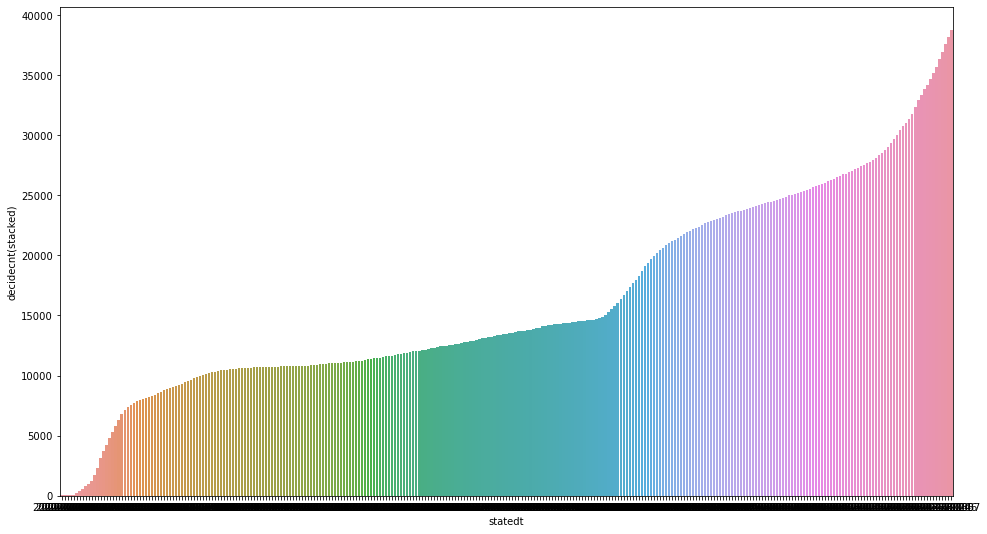

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,9))
sns.barplot(x=corona_stacked_df.index, y='decidecnt(stacked)', data=corona_stacked_df)

# 꺾은선 그래프

In [8]:
display(corona_df.tail())

,seq,statetime,createdt,updatedt,decidecnt,examcnt,deathcnt,carecnt,clearcnt
statedt,,,,,,,,,
2020-12-04,342,0,2020-12-04 09:44:32.682,NaN,36332,64017,536,7185,28611
2020-12-05,343,0,2020-12-05 10:15:39.581,NaN,36915,66267,540,7458,28917
2020-12-06,344,0,2020-12-06 09:48:54.801,NaN,37546,67716,545,7873,29128
2020-12-07,345,0,2020-12-07 09:30:10.758,NaN,38161,68010,549,8311,29301
2020-12-08,346,0,2020-12-08 09:29:46.760,NaN,38755,71274,552,8553,29650


In [9]:
import pandas as pd

corona_line_df = corona_df['decidecnt'].copy()
corona_line_df = pd.DataFrame(corona_line_df)

corona_line_df['shift_down'] = corona_df['decidecnt'].shift(+1).fillna(0)
corona_line_df['decidecnt_day'] = corona_df['decidecnt'] - corona_line_df['shift_down']
corona_line_df['decidecnt_day'] = corona_line_df['decidecnt_day'].shift(-1).fillna(0)
corona_line_df['decidecnt_day'] = corona_line_df['decidecnt_day'].astype('int')

display(corona_line_df)

,decidecnt,shift_down,decidecnt_day
statedt,,,
2020-02-15,28,0.0,1
2020-02-16,29,28.0,1
2020-02-17,30,29.0,1
2020-02-18,31,30.0,20
2020-02-19,51,31.0,53
...,...,...,...
2020-12-04,36332,35703.0,583
2020-12-05,36915,36332.0,631
2020-12-06,37546,36915.0,615


## Save the Daily number of confirmed patients

In [10]:
corona_line_df = corona_line_df.loc['2020-02-15':'2020-12-07', :]
corona_line_df.to_csv('./Number_of_confirmed_patients(Daily).csv', header=True, index=True)

<AxesSubplot:xlabel='statedt', ylabel='decidecnt_day'>

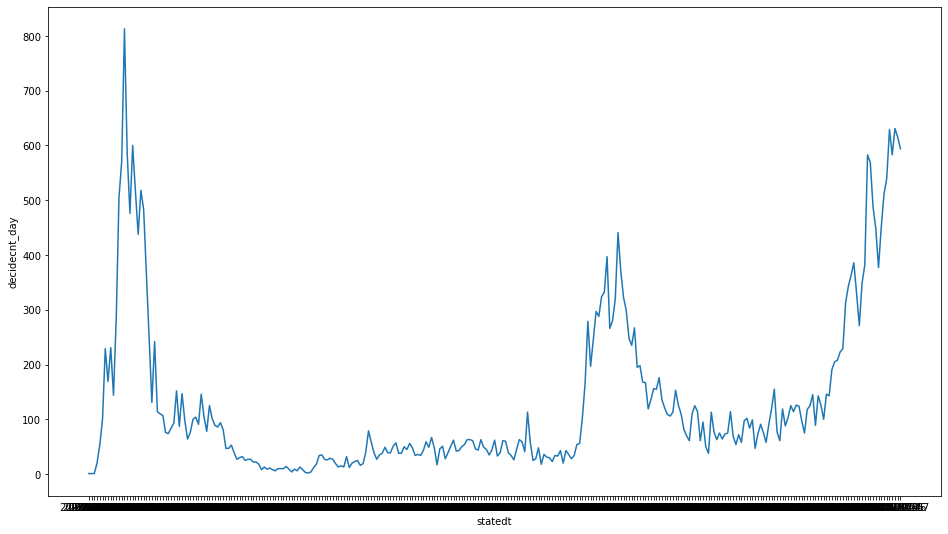

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(16,9))
sns.lineplot(x=corona_line_df.index, y='decidecnt_day', data=corona_line_df)

### 이상치 탐색

<AxesSubplot:xlabel='decidecnt_day'>

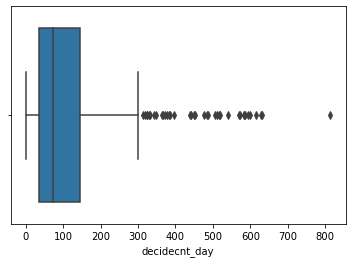

In [12]:
sns.boxplot(x=corona_line_df['decidecnt_day']) # 확진자 급증으로 인한 정상수치

In [13]:
corona_line_df['decidecnt_day'].describe()

count    297.000000
mean     130.393939
std      150.551653
min        1.000000
25%       36.000000
50%       73.000000
75%      146.000000
max      813.000000
Name: decidecnt_day, dtype: float64

# 꺾은선 그래프 & 누적 막대그래프

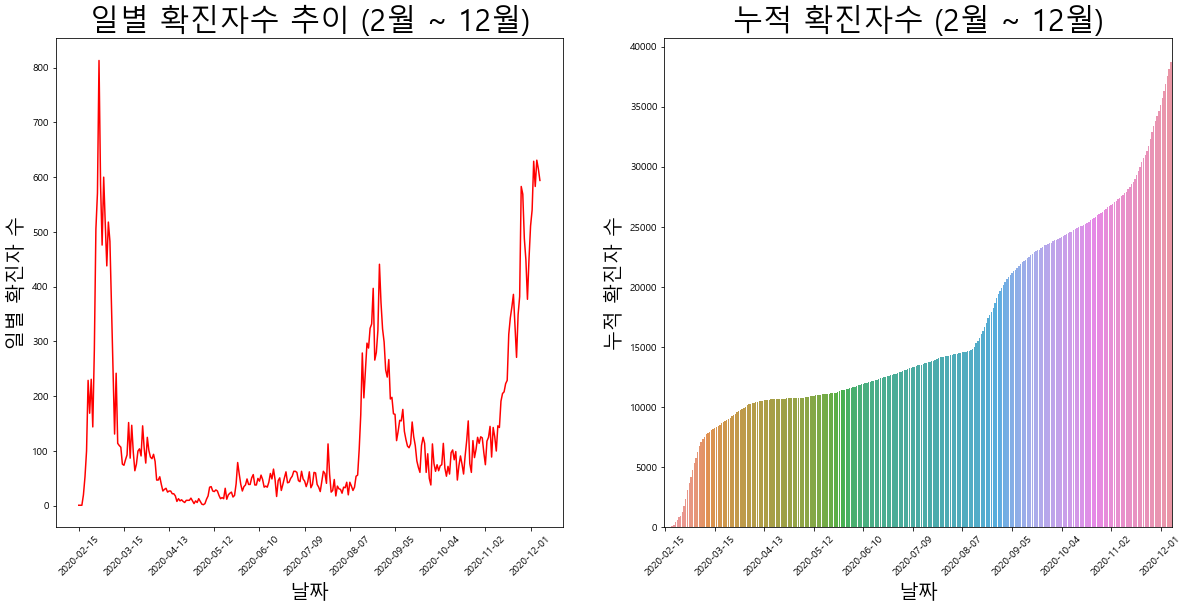

In [15]:
import matplotlib.pyplot as plt

### 폰트 오류 해결 ###
from matplotlib import font_manager, rc
font_path = "./malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rc('axes', unicode_minus=False)
######################


# 그래프 객체 생성 (figure에 2개의 서브 플롯을 생성)
fig = plt.figure(figsize=(20,9))   
ax1 = fig.add_subplot(1,2, 1)
ax2 = fig.add_subplot(1,2, 2)


##### 꺾은선 그래프 #####
lineplot = sns.lineplot(x=corona_line_df.index, y='decidecnt_day', data=corona_line_df, ax=ax1, color='r')

lineplot.set_title('일별 확진자수 추이 (2월 ~ 12월)', fontsize=30)
lineplot.set_xlabel('날짜', fontsize=20)
lineplot.set_ylabel('일별 확진자 수', fontsize=20)

# Matplotlib에서 플롯 업데이트를 자동화하기 위해 데이터를 업데이트하고 기존 플롯을 지우고 업데이트 된 데이터를 루프로 플롯한다.
plt.draw() # 기존 플롯을 지우기위해 plt.draw() 메서드 이용

lineplot_ticks = lineplot.get_xticks() # 0, 1, 2, ... , 296
lineplot_labels = lineplot.get_xticklabels() # Text(0, 0, '2020-02-15'), Text(1, 0, '2020-02-16'), ..., Text(296, 0, '2020-12-07')
lineplot_labels_list = []
for i in range(len(lineplot_labels)):
    lineplot_labels_list.append(lineplot_labels[i].get_text())
lineplot.set_xticks(lineplot_ticks[0::29])
lineplot.set_xticklabels(lineplot_labels_list[0::29], rotation=45)


##### 누적 막대그래프 #####
barplot = sns.barplot(x=corona_stacked_df.index, y='decidecnt(stacked)', data=corona_stacked_df, ax=ax2)

barplot.set_title('누적 확진자수 (2월 ~ 12월)', fontsize=30)
barplot.set_xlabel('날짜', fontsize=20)
barplot.set_ylabel('누적 확진자 수', fontsize=20)

barplot_ticks = barplot.get_xticks() # 0, 1, 2, ... , 297
barplot_labels = barplot.get_xticklabels() # Text(0, 0, '2020-02-15'), Text(1, 0, '2020-02-16'), ..., Text(296, 0, '2020-12-07')
barplot_labels_list = []
for i in range(len(barplot_labels)):
    barplot_labels_list.append(barplot_labels[i].get_text())
barplot.set_xticks(barplot_ticks[0::29])
barplot.set_xticklabels(barplot_labels_list[0::29], rotation=45)

plt.savefig('./Corona Infection Status.png')
plt.show()